In [ ]:
!pip install nltk requests beautifulsoup4

In [ ]:
import nltk
nltk.download("stopwords")
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer

import re
from bs4 import BeautifulSoup
import requests

In [4]:
def fetch_wiki_text(url):
  response = requests.get(url)
  if response.status_code != 200:
    print(f"Failed to fetch {url}")
    return ""

  soup = BeautifulSoup(response.content, "html.parser")

  paragraphs = soup.find_all('p')
  text = " ".join([para.get_text() for para in paragraphs])

  text = re.sub(r'\W+', ' ', text).lower()

  return text

In [8]:
def preprocess_text(text):
  words = text.split()
  stop_words = set(stopwords.words("english"))
  words = [word for word in words if word not in stop_words]
  stemmer = PorterStemmer()
  words = [stemmer.stem(word) for word in words]
  return set(words)

In [9]:
urls = [
    "https://en.wikipedia.org/wiki/Apollo_8",
    "https://en.wikipedia.org/wiki/Machine_learning",
    "https://en.wikipedia.org/wiki/Artificial_intelligence"
]

texts = [fetch_wiki_text(url) for url in urls]
preprocessed_tokens = [preprocess_text(text) for text in texts]

In [11]:
def jaccard_similarity(set1, set2):
  intersection = len(set1.intersection(set2))
  union = len(set1.union(set2))
  return intersection/union

In [10]:
import matplotlib.pyplot as plt
import numpy as np

def plot_similarity_heatmap(similarities, labels):
  fig, ax = plt.subplots()
  cax = ax.matshow(similarities, cmap = 'coolwarm')
  plt.colorbar(cax)

  ax.set_xticks(np.arange(len(labels)))
  ax.set_yticks(np.arange(len(labels)))
  ax.set_xticklabels(labels)
  ax.set_yticklabels(labels)
  plt.title("Jaccard Similarity Heatmap")
  plt.show()

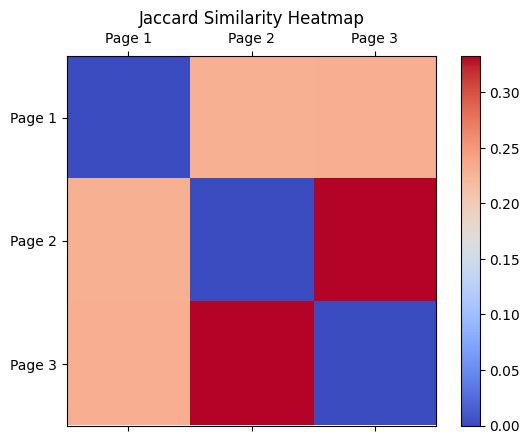

In [12]:
num_pages = len(preprocessed_tokens)
similarities = np.zeros((num_pages, num_pages))

for i in range(num_pages):
  for j in range(num_pages):
    if i != j:
      similarities[i][j] = jaccard_similarity(preprocessed_tokens[i], preprocessed_tokens[j])

labels = [f"Page {i+1}" for i in range (num_pages)]
plot_similarity_heatmap(similarities, labels)